In [1]:
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/markers/scrap"

In [2]:
from os.path import join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [3]:
avgExp_df = pd.read_csv(join(outdir, "avgExp.tsv"), sep="\t").transpose().dropna(axis=1, how="all")
marker_df = pd.read_csv(join(outdir, "markerExp.tsv"), sep="\t").set_index("Row.names")
#marker_df.set_index("Row.names")
avgExp_df.index.name = "seurat_clusters"


In [4]:
avgExp_df.head()

,LYZ,GAS7,MPO,ELANE,LPO,PRTN3,IDS,GBP5,PTCHD1,YPEL5,...,CD79B,EBF1,GSDME,ARHGAP26,RAB31,ATP8B4,FNDC3B,GCNT1,ETV6,NSMCE2
seurat_clusters,,,,,,,,,,,,,,,,,,,,,
0,0.050804,1.213701,0.088602,0.017565,0.176160,0.019398,0.453033,0.156115,0.128554,0.583891,...,0.028592,0.816859,0.146002,2.946984,0.703616,0.879229,2.015177,1.233133,2.211813,0.941911
1,0.037684,1.419355,0.432147,0.157952,0.667595,0.147886,0.241852,0.112901,0.061183,0.227622,...,0.017817,0.670962,0.158112,2.550645,0.835791,1.756082,2.758751,1.265108,2.489031,1.017135
2,0.029398,0.968075,0.048080,0.006614,0.162239,0.010942,0.777732,0.326185,0.300801,0.748235,...,0.030373,0.862361,0.117261,2.047915,0.463770,0.709634,1.075445,1.015654,1.917048,0.610036
3,0.014428,0.539559,0.039040,0.027342,0.244729,0.026483,0.206881,0.050330,0.084991,0.270008,...,0.015722,0.563023,0.135442,1.643199,0.522184,0.710627,1.115776,0.971805,1.715626,0.871991
4,0.125577,2.125760,0.185074,0.062894,0.370776,0.060163,0.278932,0.077183,0.044724,0.233519,...,0.014009,0.644550,0.125354,2.991111,1.242449,1.617783,2.090589,1.529953,2.276350,1.244301


In [5]:
clust_size = marker_df.groupby("seurat_clusters").size()
clust_expr = marker_df.groupby("seurat_clusters").apply(lambda x: (x.drop("seurat_clusters", axis=1)>0).sum())

pct_df = clust_expr.apply(lambda x: x/(clust_size[x.name]), axis=1)
pct_df.index = pct_df.index.astype(str).astype(object)

pct_df

,LYZ,GAS7,MPO,ELANE,LPO,PRTN3,IDS,GBP5,PTCHD1,YPEL5,...,CD79B,EBF1,GSDME,ARHGAP26,RAB31,ATP8B4,FNDC3B,GCNT1,ETV6,NSMCE2
seurat_clusters,,,,,,,,,,,,,,,,,,,,,
0,0.113436,0.800093,0.196188,0.048350,0.333333,0.052069,0.572757,0.255230,0.202696,0.659228,...,0.066016,0.773129,0.271502,0.955370,0.704324,0.744305,0.910739,0.857741,0.935379,0.750814
1,0.030474,0.612752,0.253633,0.098453,0.359587,0.094233,0.170652,0.082044,0.045476,0.157056,...,0.014065,0.372714,0.109236,0.785279,0.439756,0.667604,0.803563,0.580403,0.794655,0.511017
2,0.044904,0.677094,0.074168,0.013118,0.227043,0.016650,0.644299,0.371342,0.359233,0.627144,...,0.049950,0.676085,0.163976,0.904137,0.480323,0.589808,0.738648,0.724016,0.870333,0.551968
3,0.013589,0.313156,0.033972,0.020383,0.169240,0.024707,0.159358,0.040766,0.072267,0.182211,...,0.012971,0.350216,0.101297,0.676343,0.334157,0.390364,0.543545,0.496603,0.678196,0.471896
4,0.101017,0.777627,0.146441,0.052881,0.263051,0.053559,0.211525,0.063729,0.044068,0.172203,...,0.014237,0.412881,0.102373,0.863729,0.615593,0.704407,0.774915,0.667797,0.797966,0.608136
5,0.037602,0.512195,0.054878,0.011179,0.238821,0.024390,0.274390,0.075203,0.122967,0.209350,...,0.014228,0.426829,0.077236,0.772358,0.406504,0.685976,0.817073,0.559959,0.732724,0.568089
6,0.029197,0.666667,0.139903,0.014599,0.188564,0.017032,0.384428,0.172749,0.136253,0.397810,...,0.023114,0.558394,0.164234,0.843066,0.496350,0.632603,0.718978,0.644769,0.845499,0.497567
7,0.040845,0.378873,0.039437,0.009859,0.222535,0.025352,0.435211,0.085915,0.330986,0.587324,...,0.022535,0.611268,0.239437,0.864789,0.464789,0.504225,0.784507,0.692958,0.877465,0.650704
8,0.011887,0.252600,0.025260,0.020802,0.071322,0.008915,0.074294,0.025260,0.029718,0.072808,...,0.007429,0.167905,0.031204,0.347697,0.157504,0.249629,0.301634,0.222883,0.380386,0.197623


In [6]:
dot_df = pd.merge(pct_df.reset_index().melt(id_vars=["seurat_clusters"], value_name="pctExp"),
             avgExp_df.reset_index().melt(id_vars=["seurat_clusters"], value_name="avgExp"), 
             on=["seurat_clusters", "variable"])

## Dotplot 

In [7]:
dot_df.isnull().any()

seurat_clusters    False
variable           False
pctExp             False
avgExp             False
dtype: bool

In [8]:
print((dot_df==-np.infty).any())
print((dot_df==np.infty).any())

seurat_clusters    False
variable           False
pctExp             False
avgExp             False
dtype: bool
seurat_clusters    False
variable           False
pctExp             False
avgExp             False
dtype: bool


In [9]:
dot_df.head()

,seurat_clusters,variable,pctExp,avgExp
0,0,LYZ,0.113436,0.050804
1,1,LYZ,0.030474,0.037684
2,2,LYZ,0.044904,0.029398
3,3,LYZ,0.013589,0.014428
4,4,LYZ,0.101017,0.125577


In [10]:
pct_df.head()

,LYZ,GAS7,MPO,ELANE,LPO,PRTN3,IDS,GBP5,PTCHD1,YPEL5,...,CD79B,EBF1,GSDME,ARHGAP26,RAB31,ATP8B4,FNDC3B,GCNT1,ETV6,NSMCE2
seurat_clusters,,,,,,,,,,,,,,,,,,,,,
0,0.113436,0.800093,0.196188,0.048350,0.333333,0.052069,0.572757,0.255230,0.202696,0.659228,...,0.066016,0.773129,0.271502,0.955370,0.704324,0.744305,0.910739,0.857741,0.935379,0.750814
1,0.030474,0.612752,0.253633,0.098453,0.359587,0.094233,0.170652,0.082044,0.045476,0.157056,...,0.014065,0.372714,0.109236,0.785279,0.439756,0.667604,0.803563,0.580403,0.794655,0.511017
2,0.044904,0.677094,0.074168,0.013118,0.227043,0.016650,0.644299,0.371342,0.359233,0.627144,...,0.049950,0.676085,0.163976,0.904137,0.480323,0.589808,0.738648,0.724016,0.870333,0.551968
3,0.013589,0.313156,0.033972,0.020383,0.169240,0.024707,0.159358,0.040766,0.072267,0.182211,...,0.012971,0.350216,0.101297,0.676343,0.334157,0.390364,0.543545,0.496603,0.678196,0.471896
4,0.101017,0.777627,0.146441,0.052881,0.263051,0.053559,0.211525,0.063729,0.044068,0.172203,...,0.014237,0.412881,0.102373,0.863729,0.615593,0.704407,0.774915,0.667797,0.797966,0.608136


{'8': 0,
 '3': 1,
 '6': 2,
 '5': 3,
 '1': 4,
 '4': 5,
 '9': 6,
 '10': 7,
 '7': 8,
 '11': 9,
 '0': 10,
 '2': 11}

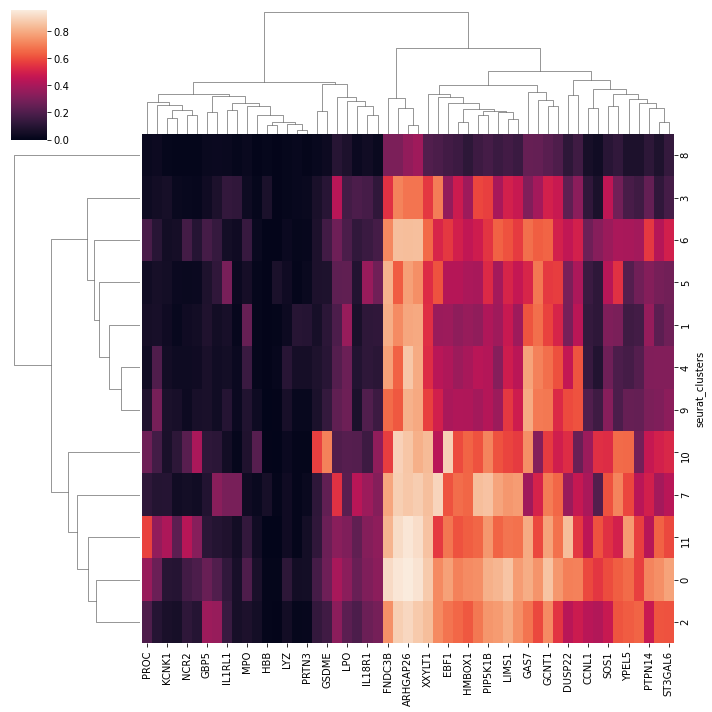

In [11]:
g = sns.clustermap(pct_df)
inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]

# create map based on this
pct_df = pct_df.iloc[inds, cols]
pct_df

genes = pct_df.columns
genes_d = {val:ind for ind,val in enumerate(genes)}
genes_d

clust = pct_df.index
clust_d = {val:ind for ind,val in enumerate(clust)}
clust_d

In [12]:
dot_df["variable_number"] = dot_df["variable"].map(genes_d)
dot_df["cluster_number"] = dot_df["seurat_clusters"].map(clust_d)

dot_df

,seurat_clusters,variable,pctExp,avgExp,variable_number,cluster_number
0,0,LYZ,0.113436,0.050804,14,10
1,1,LYZ,0.030474,0.037684,14,4
2,2,LYZ,0.044904,0.029398,14,11
3,3,LYZ,0.013589,0.014428,14,1
4,4,LYZ,0.101017,0.125577,14,5
...,...,...,...,...,...,...
631,7,NSMCE2,0.650704,0.725936,41,8
632,8,NSMCE2,0.197623,0.910270,41,0
633,9,NSMCE2,0.523077,0.910547,41,6
634,10,NSMCE2,0.489865,0.464727,41,7


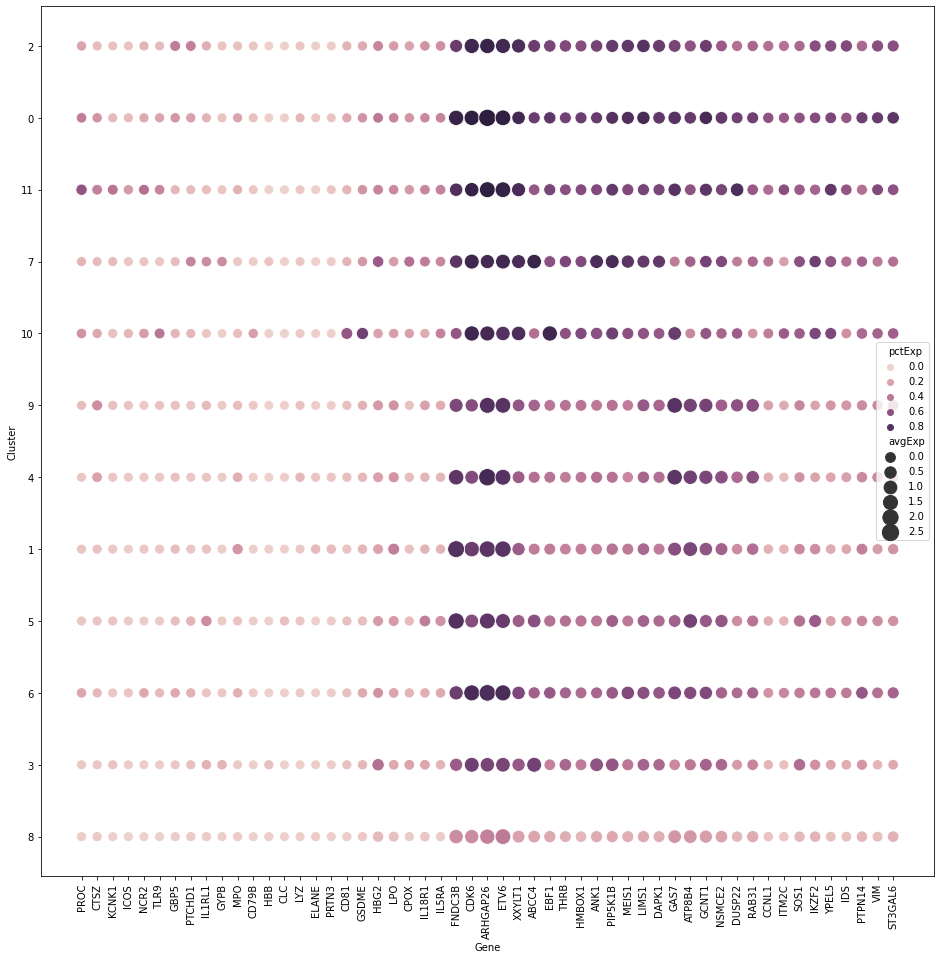

In [16]:
%matplotlib inline
f, ax =plt.subplots(figsize=(16, 16))
sns.scatterplot(data=dot_df, x="variable_number", y="cluster_number", 
                hue="pctExp", size="avgExp", sizes=(96,300))
#ax.set_xticklabels(genes_d)
plt.xticks(list(genes_d.values()), list(genes_d.keys()), rotation=90);
plt.yticks(list(clust_d.values()), list(clust_d.keys())); #, rotation=90);
plt.xlabel("Gene")
plt.ylabel("Cluster")
plt.savefig(join(outdir, "dotplotInv_markers.pdf"))
plt.savefig(join(outdir, "dotplotInv_markers.svg"))